<h1 align="center"><strong>Feature Selection & DR code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **code1: 'PCA'**

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
    header=None,
    )

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X_wine = df.values[:,1:]
y_wine = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,test_size=0.30, random_state=15)
std_scale   = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

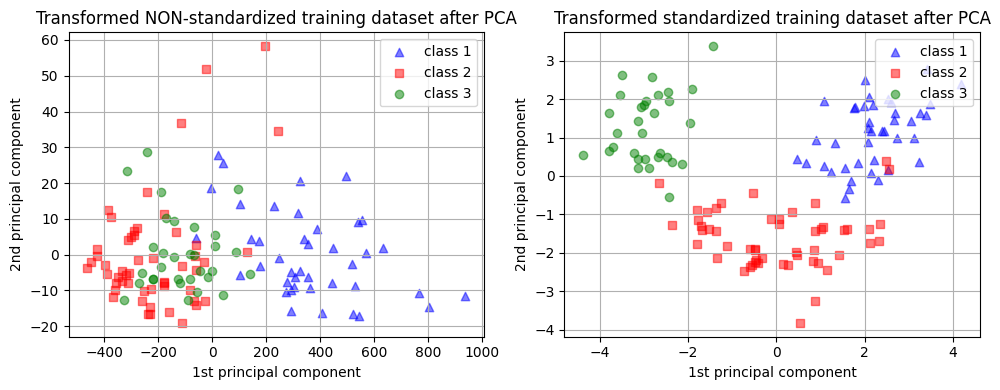

In [6]:
# on non-standardized data
pca     = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test  = pca.transform(X_test)

# on standardized data
pca_std     = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std  = pca_std.transform(X_test_std)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],color=c,label='class %s' %l,alpha=0.5,marker=m)
ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()
plt.show()  

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **code2: 'LDA'**

### **Linear Discriminant Analysis (LDA)**
* **Definition**: Also called `Normal Discriminant Analysis` or `Discriminant Function Analysis`.
* **Purpose**: A supervised **dimensionality reduction** and **classification** technique.
* **How it works**: `Projects features into a lower-dimensional space to maximize class separation.`
* **Goal**: `Finds a linear combination of features that best distinguishes between classes`.

---

### Extensions of LDA

1. **Quadratic Discriminant Analysis (QDA)** – Allows each class to have its own variance/covariance.
2. **Flexible Discriminant Analysis (FDA)** – Uses nonlinear combinations of features (e.g., splines).
3. **Regularized Discriminant Analysis (RDA)** – Adds regularization to covariance estimates to control variable influence.

---

| **LDA Aspect**            | **Advantages**                              | **Disadvantages**                                             |
| ------------------------- | ------------------------------------------- | ------------------------------------------------------------- |
| **Efficiency**            | Simple, fast, and computationally efficient | —                                                             |
| **High-Dimensional Data** | Works well even when features >> samples    | Performance drops in very high-dimensional spaces             |
| **Multicollinearity**     | Handles correlated features effectively     | —                                                             |
| **Data Distribution**     | —                                           | Assumes Gaussian distribution, which may not hold             |
| **Covariance Assumption** | —                                           | Assumes equal covariance matrices across classes              |
| **Class Separability**    | —                                           | Assumes linear separability, limiting use on complex datasets |


In [8]:
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names,data=iris.data)
dataset['target'] = iris.target

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2)

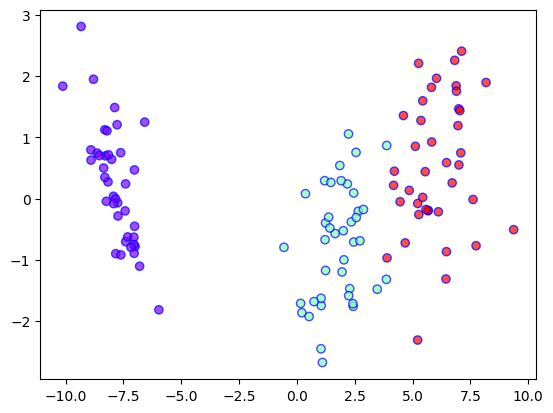

In [13]:
# apply Linear Discriminant Analysis
lda     = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test  = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)
plt.show()

Accuracy : 0.967

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


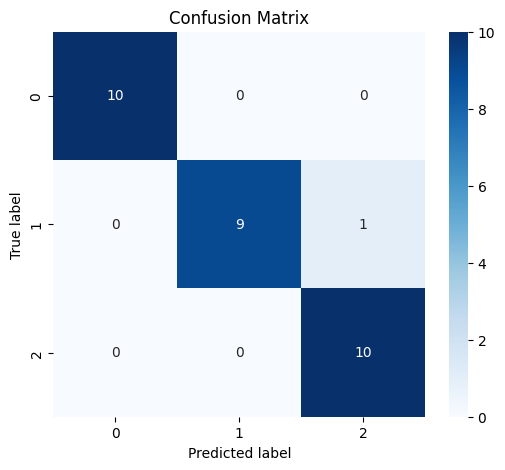

In [20]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print(f'Accuracy : {accuracy_score(y_test, y_pred):.3f}\n')
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

# plot the confusion matrix using heat map
plt.figure(figsize=(6,5))
sns.heatmap(conf_m, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()